In [1]:
# Import all the important libraries
import numpy as np
import numba as nb 
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib

from sys_pde_no_growth_Lmx1a import *

In [14]:
# System Params - Same for all the species
sys_params = np.zeros(2)
sys_params[0] = 2                   # Hill coefficient
sys_params[1] = 0.7                 # BMP(t=0)

# BMP
b_params = np.zeros(6)
b_params[0] = 0.4                    # D_b
b_params[1] = 25                     # a_b_s
b_params[2] = 1.2**sys_params[0]    # K_b_s (with exponent)
b_params[3] = 100                  # a_s_l
b_params[4] = 1**sys_params[0]  # K_s_l
b_params[5] = 0.06                   # d_b

# BMP i
i_params = np.zeros(4)
i_params[0] = 1.0                    # D_i
i_params[1] = 4.5                    # a_i_s
i_params[2] = 0.41**sys_params[0]    # K_i_s
i_params[3] = 0.02                   # d_i

# pSmad
s_params = np.zeros(4)
s_params[0] = 11                   # a_s_b
s_params[1] = 4.863**sys_params[0]    # K_s_b
s_params[2] = 5.309**sys_params[0]   # K_s_i
s_params[3] = 1                     # d_s

# Lmx1a
l_params = np.zeros(5)
l_params[0] = 3.837                     # a_l_s
l_params[1] = 0.08**sys_params[0]   # K_l_s (with exponent)
l_params[2] = 2.14                     # a_l_w
l_params[3] = 7.891**sys_params[0]    # K_l_w (with exponent)
l_params[4] = 1/8                   # d_l

# Wnt
w_params = np.zeros(6)
w_params[0] = 0.5                    # D_w
w_params[1] = 5                     # a_w_l
w_params[2] = 3.9**sys_params[0]    # K_w_l (with exponent)
w_params[3] = 3.17                     # a_w_s
w_params[4] = 7.437**sys_params[0]    # K_w_s (with exponent)
w_params[5] = 1/6                   # d_w

In [15]:
# Define all the simulations params
sol_params = np.zeros(10)
sol_params[0] = 0.05 # dt 
sol_params[1] = 1 # dx
sol_params[2] = 250/sol_params[1] #Lx
sol_params[3] = 250/sol_params[1] #Ly
sol_params[4] = 100/sol_params[1] # Radius of cell colony
sol_params[5] = 144/sol_params[0] # Total time, T
sol_params[6] = 1/sol_params[0] # Delta t (snapshot saving time)
sol_params[7] = 8/sol_params[0] # Cell Colony starts growing then (early migratory cells)
sol_params[8] = 0.25*sol_params[0] # Cell colony growth rate

In [16]:
# Get the initial conditions
array_b, array_i, array_s, array_l, array_w = create_IC_1(sys_params, sol_params)

In [17]:
data_b_time, data_i_time, data_s_time, data_l_time, data_w_time = run_and_save_sys(array_b, array_i, array_s, array_l, array_w, b_params, i_params, s_params,
                     l_params, w_params, sys_params, sol_params)

In [18]:
t_measured = np.array([ 0,   0.5,  0.75, 1.0,   2.0,  3.0,  4.0,  5.0,  6.0,  7.,   8.0,  24.0,  48.0,  56.0,  64.0,  67.0,  70.0,  72.0,  80.0,  96.0,  110,   126,   132,   144])
x2_measured = np.array([0.0, 0.68, 0.77, 1.283, 1.12, 1.84, 1.37, 1.29, 1.80, 1.03, 0.96, 0.012, 0.12,  0.40,  0.60,  0.7,   0.80,  0.90,  0.95,  1.00,  1.00,  1.00,  1.00,  1.00])
x2_measured /= np.max(x2_measured)

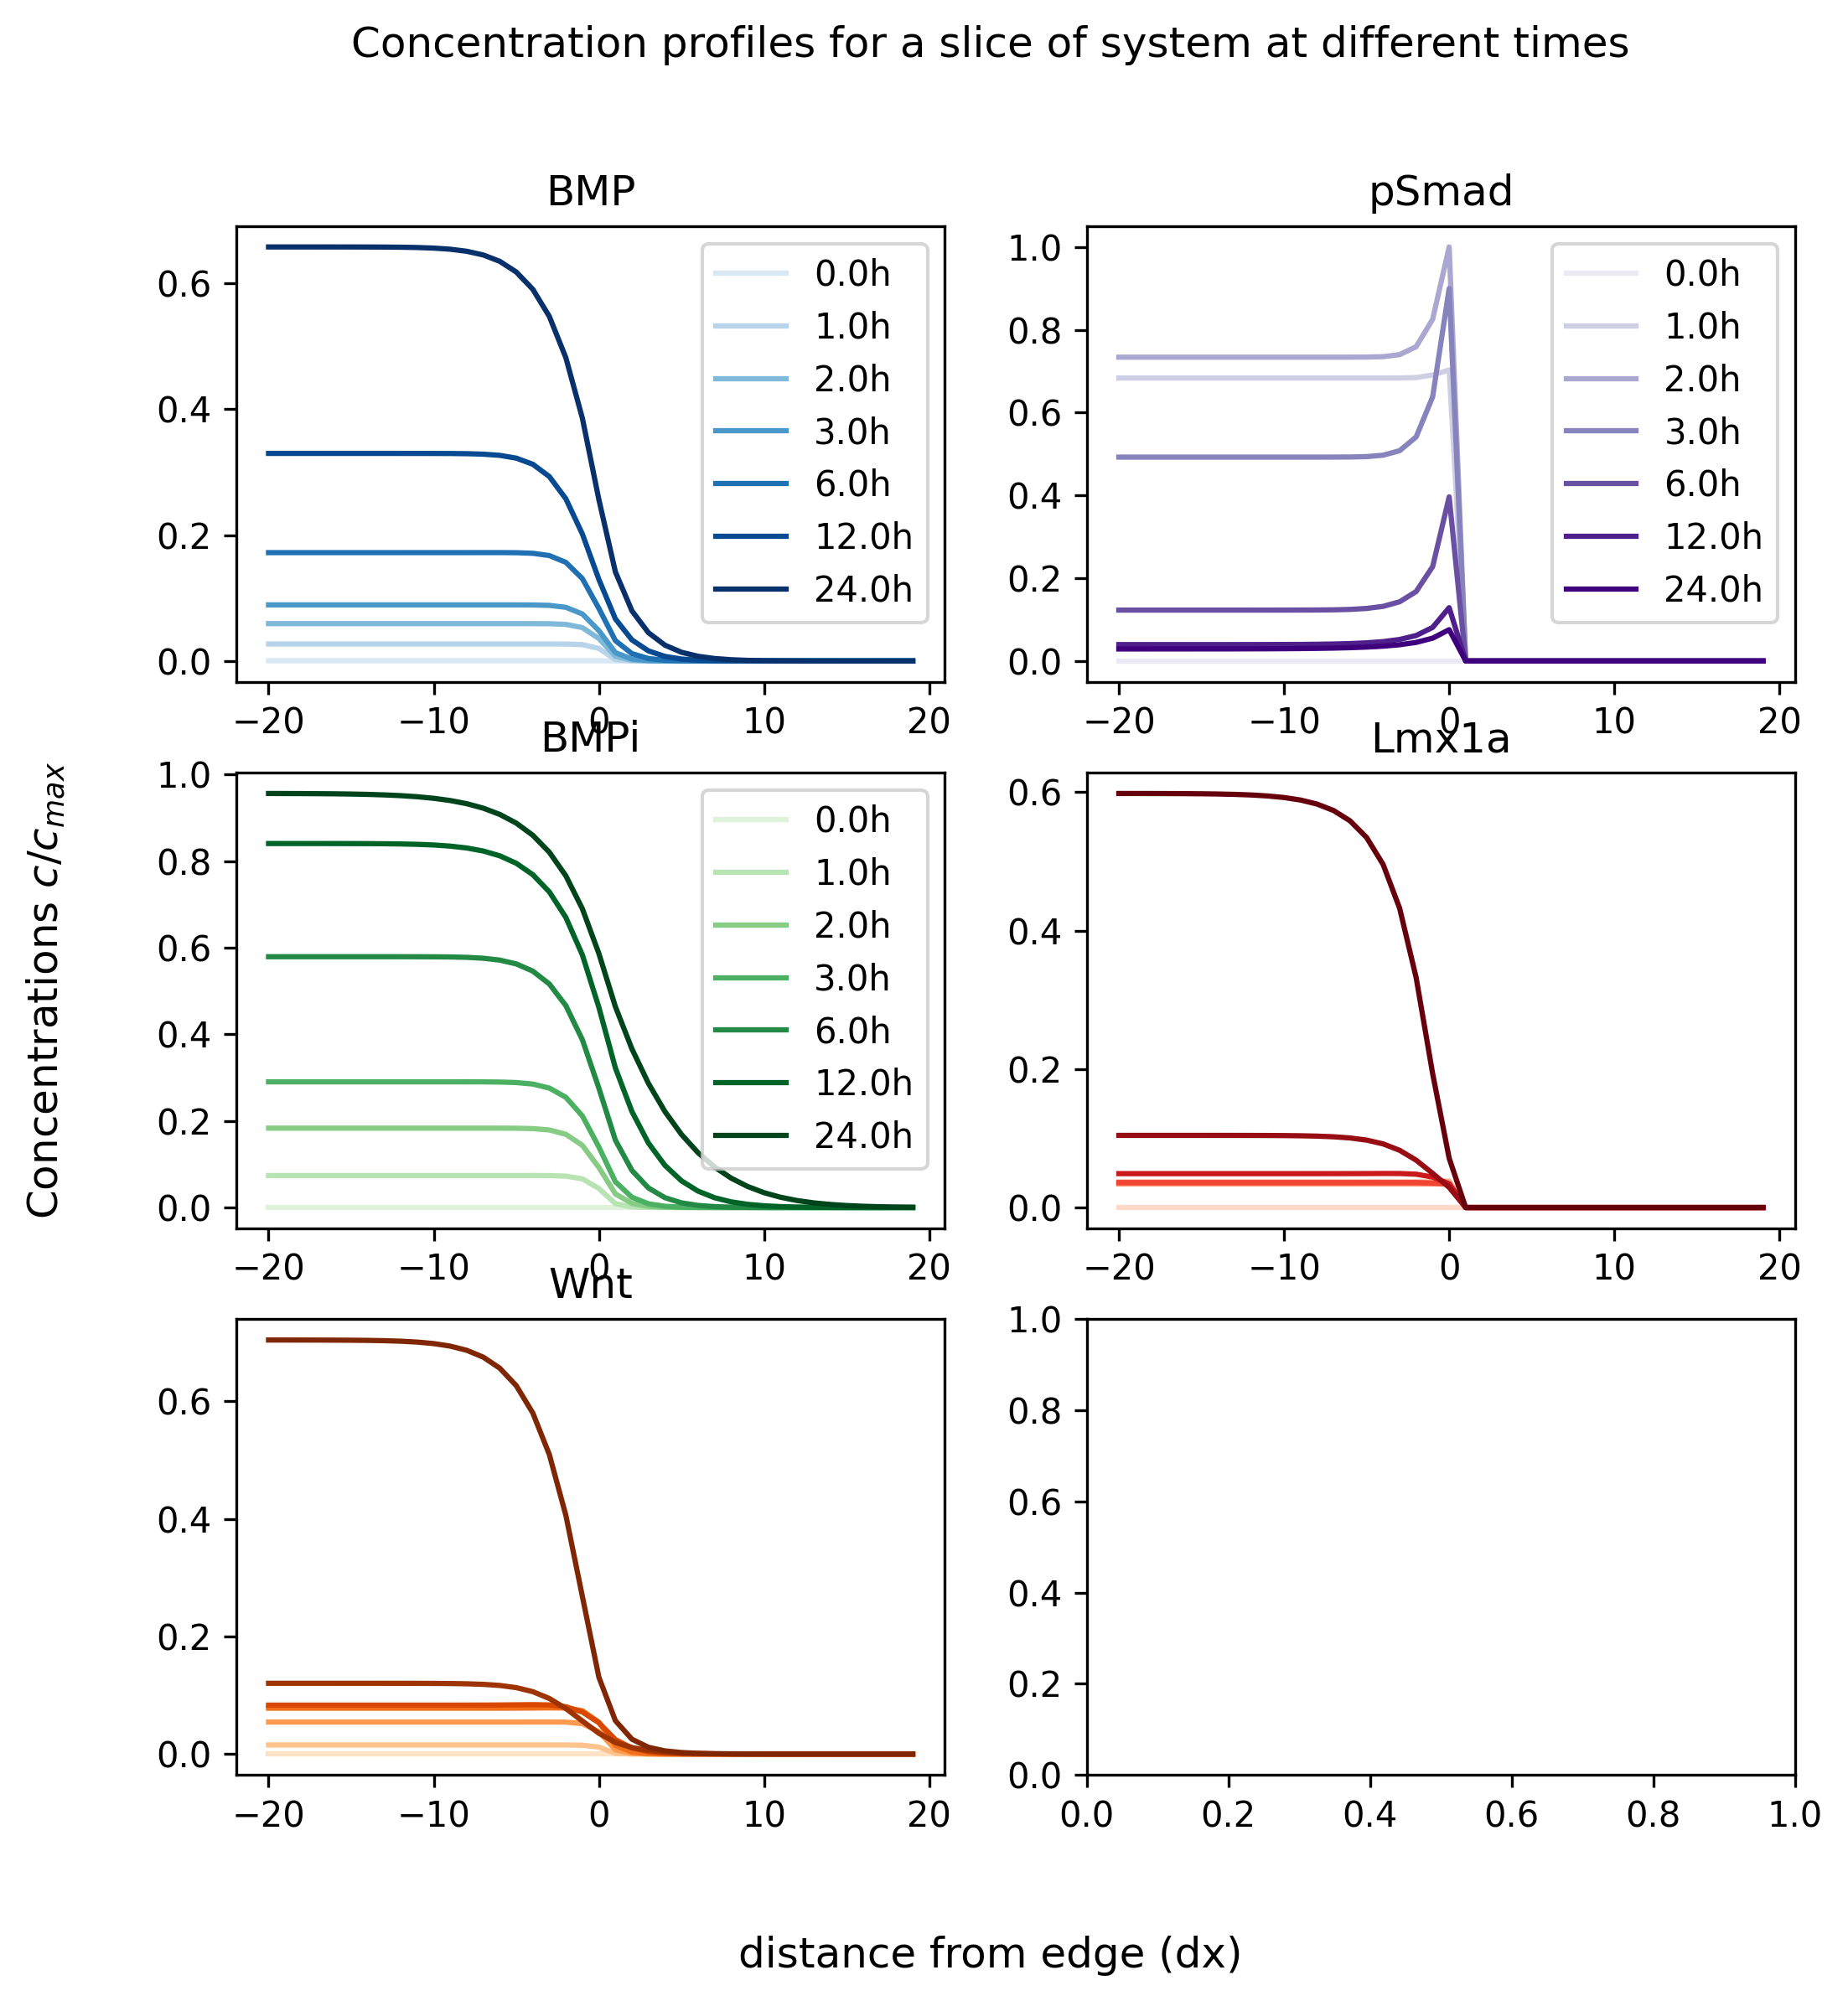

In [19]:
# Plot all the concs as a function of space over one axis from the center
fig, axes = plt.subplots(3, 2, figsize=(8, 8), dpi=300)
Lx, Ly = int(sol_params[2]), int(sol_params[3])
R = int(sol_params[4])
Tlen = sol_params[5]/sol_params[6]

T_points = np.array([0, 1, 2, 3, 6, 12, 24])
cmap_vals = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9, 1]

norm = matplotlib.colors.Normalize(vmin=0, vmax=1) 
cmap1 = plt.cm.Blues
cmap2 = plt.cm.Greens
cmap3 = plt.cm.Purples
cmap4 = plt.cm.Reds
cmap5 = plt.cm.Oranges


for i, t in enumerate(T_points):
    b_concs_slice_x = data_b_time[t][(Lx//2+R-20):(Lx//2+R+20), Ly//2]/np.max(data_b_time)
    i_concs_slice_x = data_i_time[t][(Lx//2+R-20):(Lx//2+R+20), Ly//2]/np.max(data_i_time)
    s_concs_slice_x = data_s_time[t][(Lx//2+R-20):(Lx//2+R+20), Ly//2]/np.max(data_s_time)
    l_concs_slice_x = data_l_time[t][(Lx//2+R-20):(Lx//2+R+20), Ly//2]/np.max(data_l_time)
    w_concs_slice_x = data_w_time[t][(Lx//2+R-20):(Lx//2+R+20), Ly//2]/np.max(data_w_time)


    axes[0,0].plot(np.arange(40) - 20, b_concs_slice_x, color = cmap1(norm(cmap_vals[i]))
                   , label="{}h".format(sol_params[6]*sol_params[0]*t))
    axes[0,0].set_title("BMP")
    axes[1,0].plot(np.arange(40) - 20, i_concs_slice_x, color = cmap2(norm(cmap_vals[i]))
                   , label="{}h".format(sol_params[6]*sol_params[0]*t))
    axes[1,0].set_title("BMPi")
    axes[0,1].plot(np.arange(40) - 20, s_concs_slice_x, color = cmap3(norm(cmap_vals[i]))
                   , label="{}h".format(sol_params[6]*sol_params[0]*t))
    axes[0,1].set_title("pSmad")
    axes[1,1].plot(np.arange(40) - 20, l_concs_slice_x, color = cmap4(norm(cmap_vals[i]))
                   , label="{}h".format(sol_params[6]*sol_params[0]*t))
    axes[1,1].set_title("Lmx1a")
    axes[2,0].plot(np.arange(40) - 20, w_concs_slice_x, color = cmap5(norm(cmap_vals[i]))
                   , label="{}h".format(sol_params[6]*sol_params[0]*t))
    axes[2,0].set_title("Wnt")

axes[0,0].legend()
axes[1,0].legend()
axes[0,1].legend()
fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('distance from edge (dx)')
plt.suptitle("Concentration profiles for a slice of system at different times");

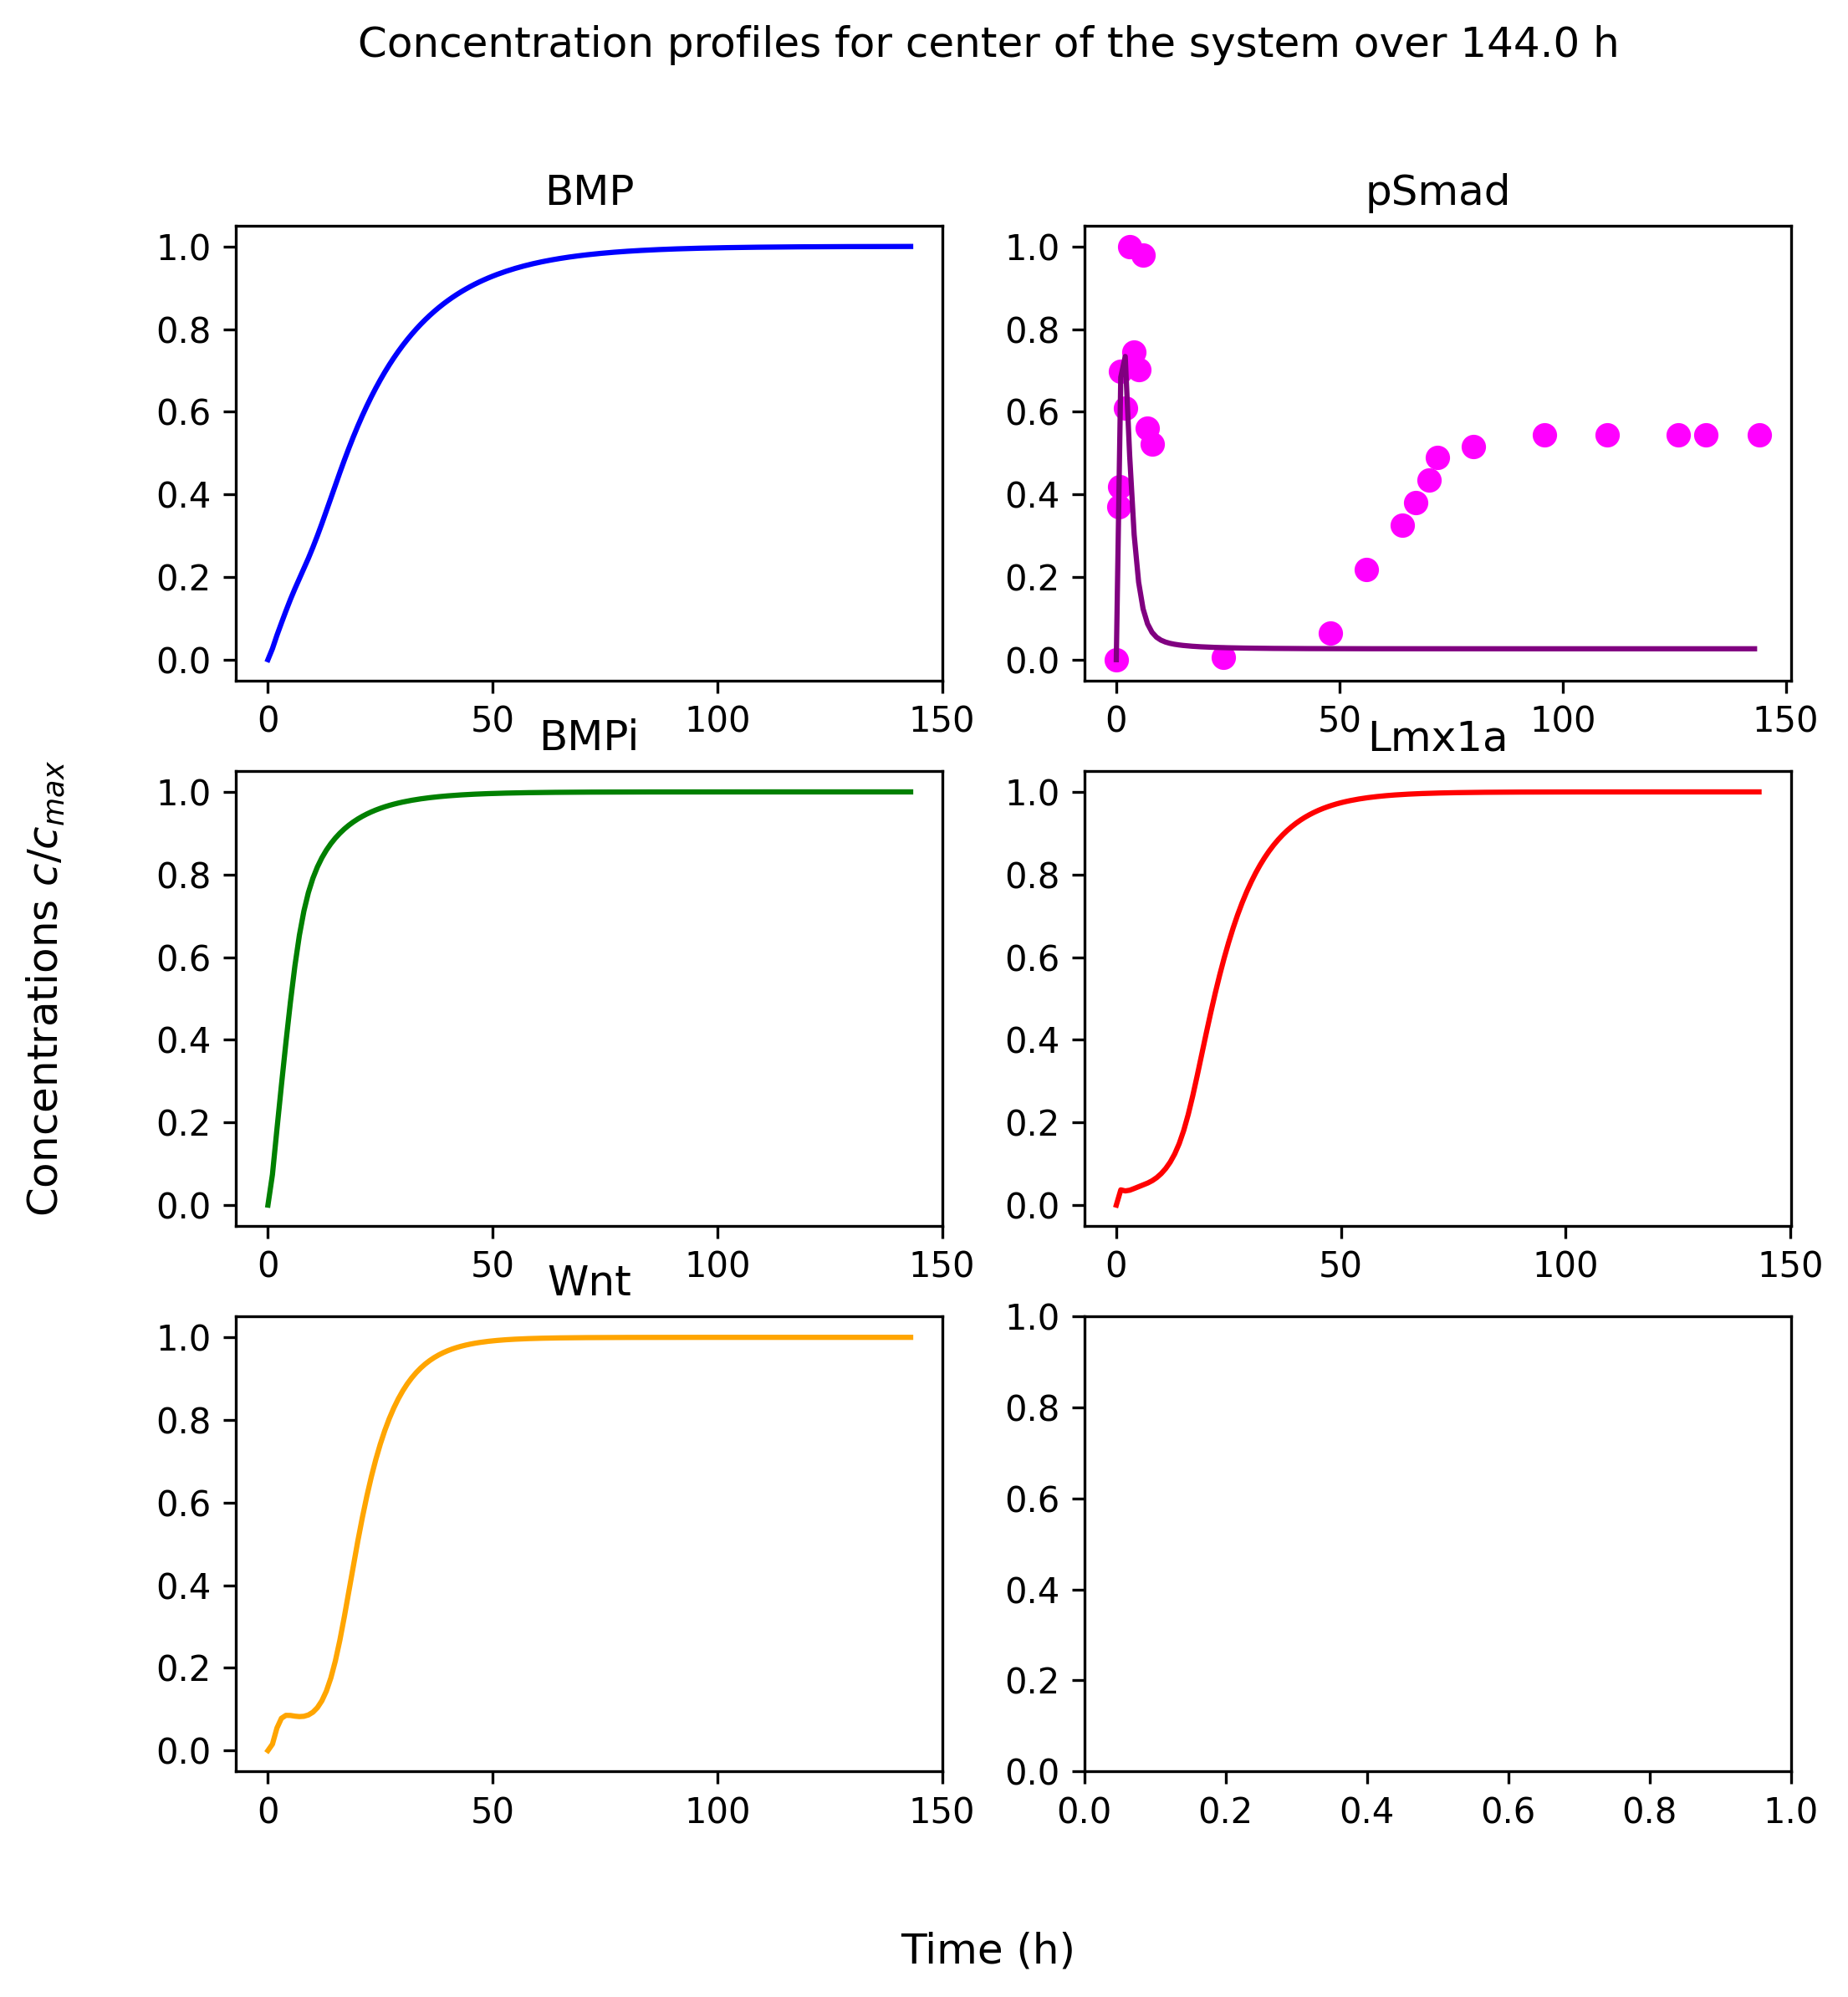

In [20]:
# Plot all the conncs as a function of time over one axis from the center
fig, axes = plt.subplots(3, 2, figsize=(8, 8), dpi=300)
Lx, Ly = int(sol_params[2]), int(sol_params[3])
R = int(sol_params[4])
b_concs_slice_t = data_b_time[:, Lx//2, Ly//2]/np.max(data_b_time)
i_concs_slice_t = data_i_time[:, Lx//2, Ly//2]/np.max(data_i_time)
s_concs_slice_t = data_s_time[:, Lx//2, Ly//2]/np.max(data_s_time)
l_concs_slice_t = data_l_time[:, Lx//2, Ly//2]/np.max(data_l_time)
w_concs_slice_t = data_w_time[:, Lx//2, Ly//2]/np.max(data_w_time)

delta_T = data_b_time.shape[0]
axes[0,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], b_concs_slice_t, color = "Blue")
axes[0,0].set_title("BMP")
axes[1,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], i_concs_slice_t, color = "Green")
axes[1,0].set_title("BMPi")
axes[0,1].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], s_concs_slice_t, color = "Purple")
axes[0,1].scatter(t_measured, x2_measured, color="magenta")
axes[0,1].set_title("pSmad")
axes[1,1].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], l_concs_slice_t, color = "Red")
axes[1,1].set_title("Lmx1a")
axes[2,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], w_concs_slice_t, color = "Orange")
axes[2,0].set_title("Wnt")
fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles for center of the system over {} h".format(sol_params[5]*sol_params[0]))
plt.savefig("NoGrowth/Conc_center_end_time.jpeg", dpi=600);

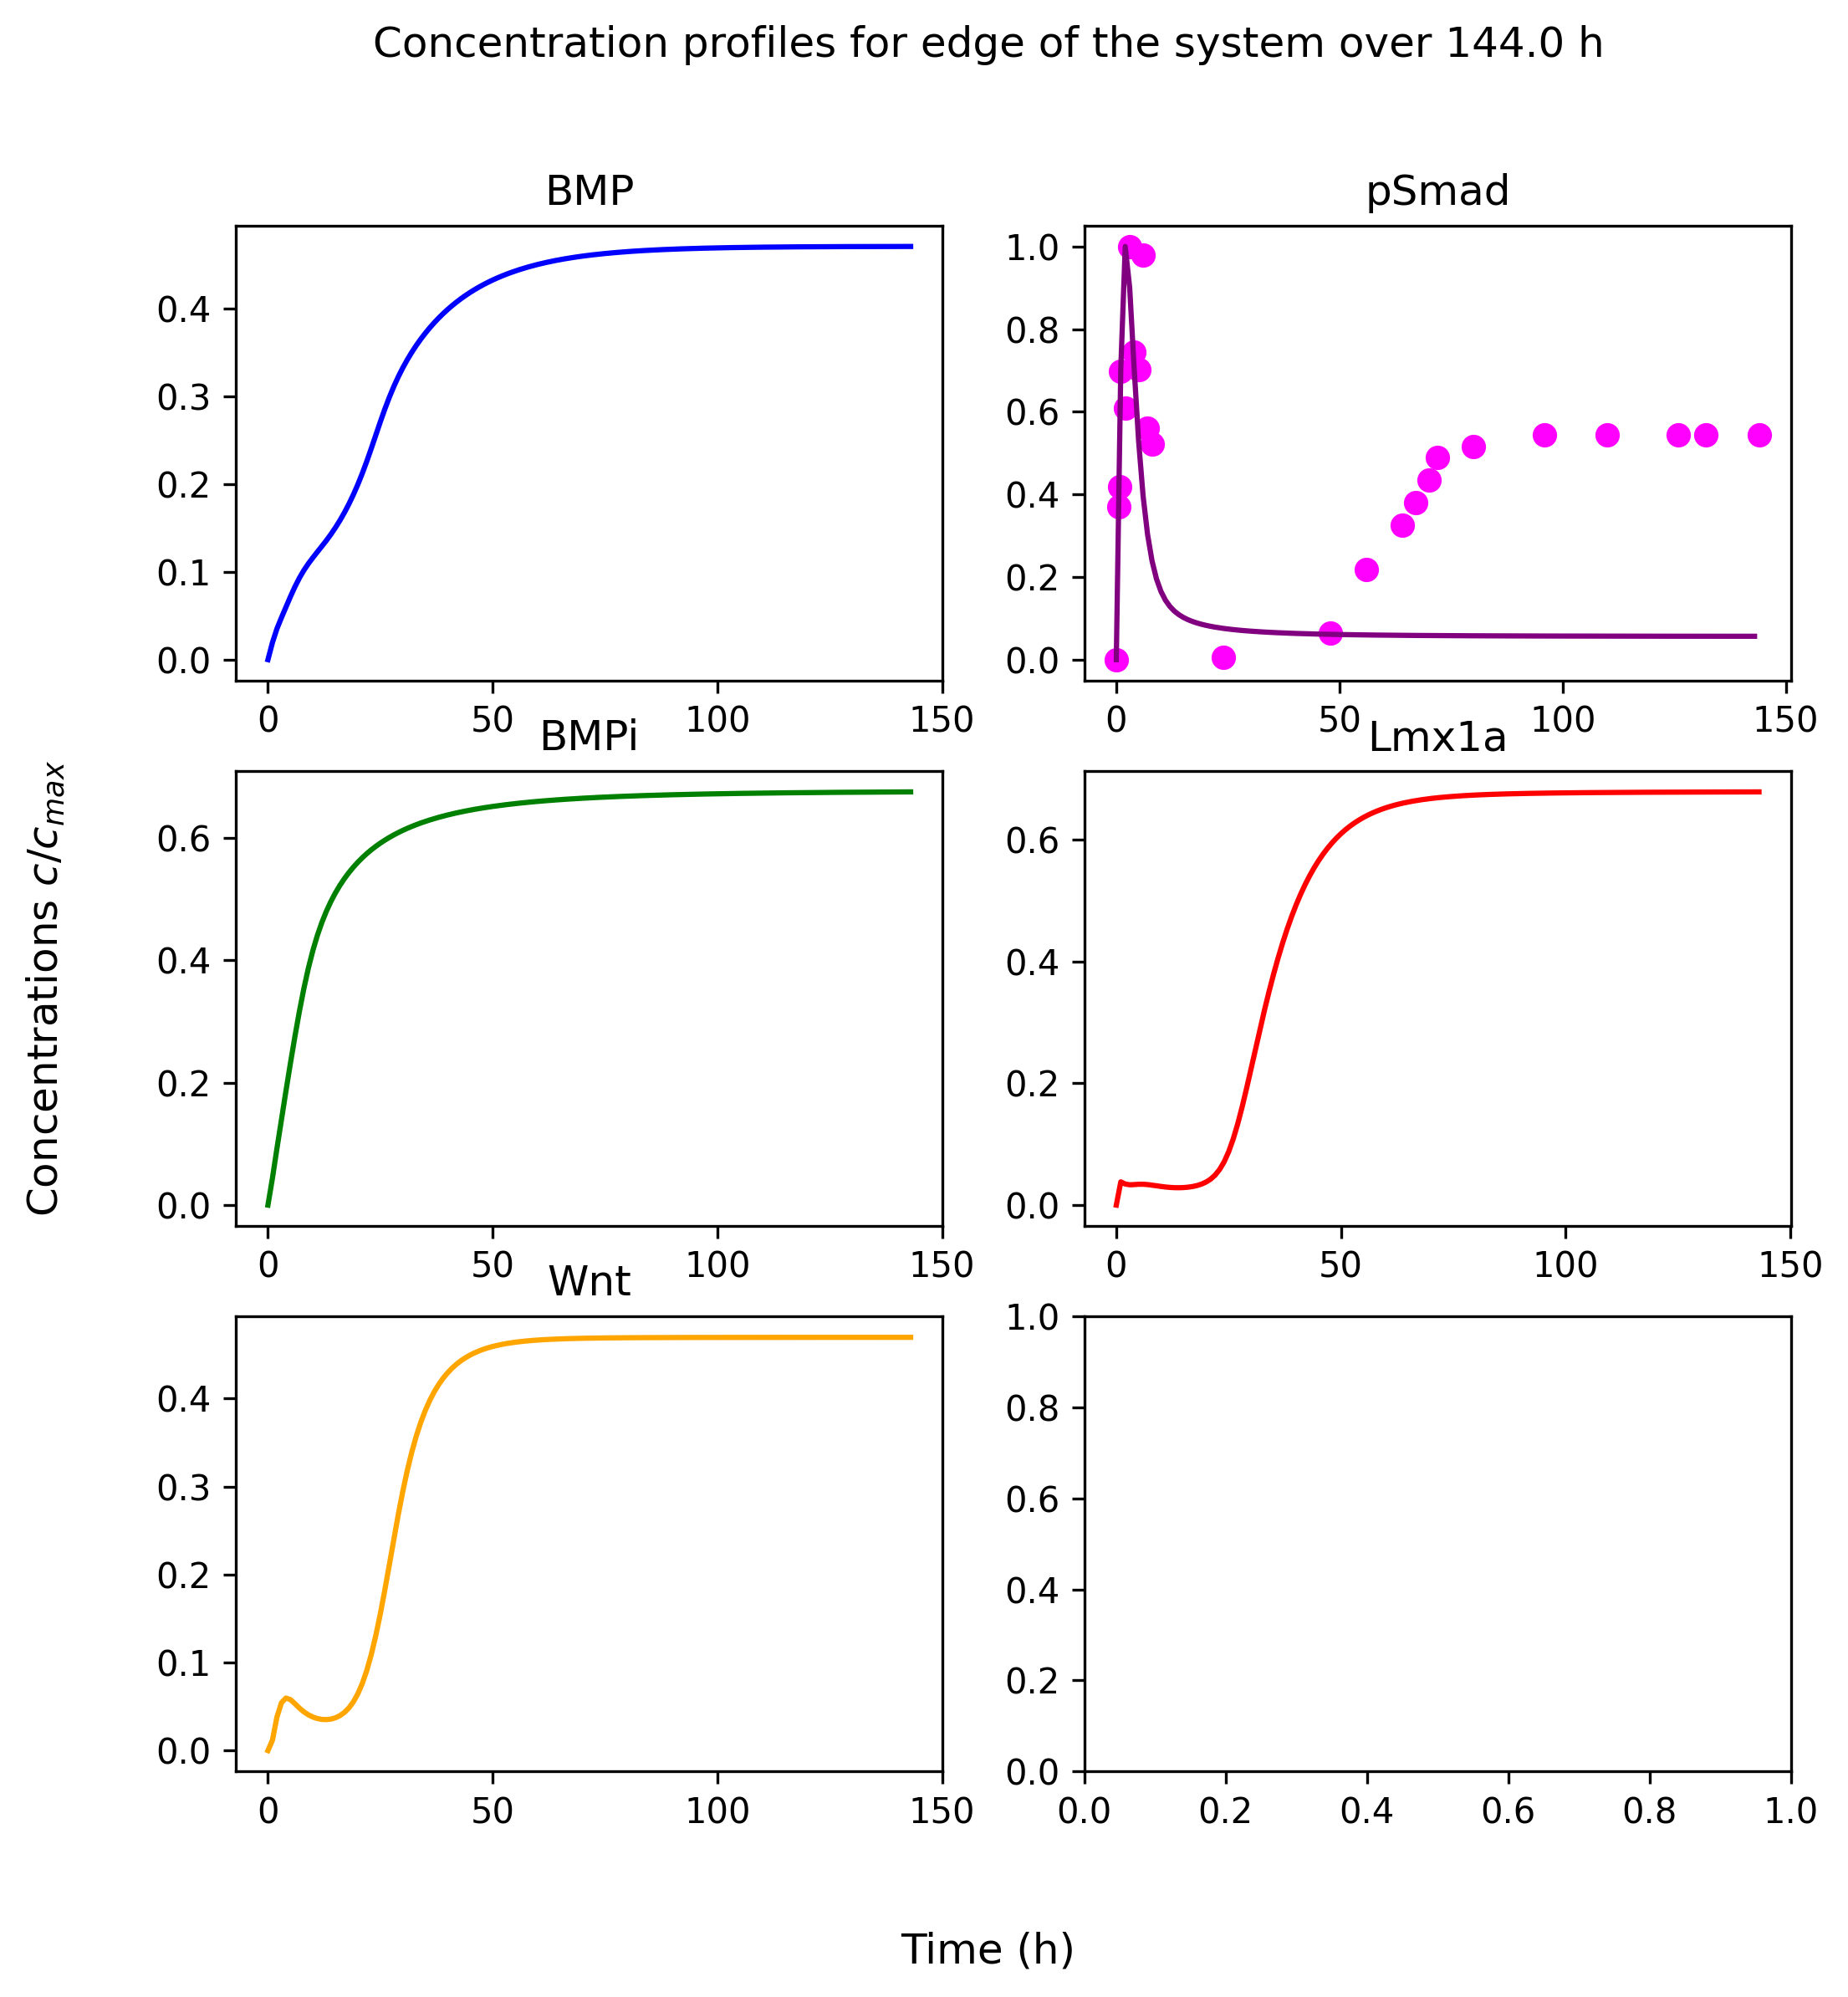

In [21]:
# Plot all the conncs as a function of time over one axis from the center
fig, axes = plt.subplots(3, 2, figsize=(8, 8), dpi=300)
Lx, Ly = int(sol_params[2]), int(sol_params[3])
R = int(sol_params[4])
b_concs_slice_t = data_b_time[:, Lx//2+R, Ly//2]/np.max(data_b_time)
i_concs_slice_t = data_i_time[:, Lx//2+R, Ly//2]/np.max(data_i_time)
s_concs_slice_t = data_s_time[:, Lx//2+R, Ly//2]/np.max(data_s_time)
l_concs_slice_t = data_l_time[:, Lx//2+R, Ly//2]/np.max(data_l_time)
w_concs_slice_t = data_w_time[:, Lx//2+R, Ly//2]/np.max(data_w_time)

delta_T = data_b_time.shape[0]
axes[0,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], b_concs_slice_t, color = "Blue")
axes[0,0].set_title("BMP")
axes[1,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], i_concs_slice_t, color = "Green")
axes[1,0].set_title("BMPi")
axes[0,1].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], s_concs_slice_t, color = "Purple")
axes[0,1].scatter(t_measured, x2_measured, color="magenta")
axes[0,1].set_title("pSmad")
axes[1,1].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], l_concs_slice_t, color = "Red")
axes[1,1].set_title("Lmx1a")
axes[2,0].plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], w_concs_slice_t, color = "Orange")
axes[2,0].set_title("Wnt")
fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles for edge of the system over {} h".format(sol_params[5]*sol_params[0]))
plt.savefig("NoGrowth/Conc_center_end_time.jpeg", dpi=600);

In [194]:
Lx, Ly = int(sol_params[2]), int(sol_params[3])
X_indices = np.repeat(np.arange(Lx), repeats=Ly).reshape((Lx, Ly))
Y_indices = X_indices.copy().T

In [195]:
### Make movies for every species
fig, axes = plt.subplots(3, 2, figsize=(12, 8), dpi=300, subplot_kw={"aspect":"equal"})
norm = matplotlib.colors.Normalize(vmin=0, vmax=1) 
level_boundaries = np.linspace(0.0, 1.0, 100)

cmap1 = plt.cm.Blues
cbar1 = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap1),
        boundaries=level_boundaries,
        values=(level_boundaries[:-1] + level_boundaries[1:]) / 2,
        ax=axes[0,0]
    )
cbar1.ax.set_ylabel(r'$c/c_{max}$', rotation=270, fontsize = 15, labelpad=15)

cmap2 = plt.cm.Greens
cbar2 = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap2),
        boundaries=level_boundaries,
        values=(level_boundaries[:-1] + level_boundaries[1:]) / 2,
        ax=axes[1,0]
    )
cbar2.ax.set_ylabel(r'$c/c_{max}$', rotation=270, fontsize = 15, labelpad=15)

cmap3 = plt.cm.Purples
cbar3 = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap3),
        boundaries=level_boundaries,
        values=(level_boundaries[:-1] + level_boundaries[1:]) / 2,
        ax=axes[0,1]
    )
cbar3.ax.set_ylabel(r'$c/c_{max}$', rotation=270, fontsize = 15, labelpad=15)

cmap4 = plt.cm.Reds
cbar4 = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap4),
        boundaries=level_boundaries,
        values=(level_boundaries[:-1] + level_boundaries[1:]) / 2,
        ax=axes[1,1]
    )
cbar4.ax.set_ylabel(r'$c/c_{max}$', rotation=270, fontsize = 15, labelpad=15)

cmap5 = plt.cm.Oranges
cbar5 = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap5),
        boundaries=level_boundaries,
        values=(level_boundaries[:-1] + level_boundaries[1:]) / 2,
        ax=axes[2,0]
    )
cbar5.ax.set_ylabel(r'$c/c_{max}$', rotation=270, fontsize = 15, labelpad=15)
fig.delaxes(axes[2,1])
fig.tight_layout()

# Plot for all times
for index in range(0, int(sol_params[5]/sol_params[6]), 1):

    BMP_max, BMP_min = np.max(data_b_time), np.min(data_b_time)
    img1 = data_b_time[index]/BMP_max
    cont1 = axes[0,0].contourf(X_indices, Y_indices, img1,
                               origin="lower", vmin=0.0, vmax=1.0, cmap=cmap1)
    axes[0,0].set_title("BMP")

    BMPi_max, BMPi_min = np.max(data_i_time), np.min(data_i_time)
    img2 = data_i_time[index]/BMPi_max
    cont2 = axes[1,0].contourf(X_indices, Y_indices, img2, 
                               origin="lower", vmin=0.0, vmax=1.0, cmap=cmap2)
    axes[1,0].set_title("BMPi")

    pSmad_max, pSmad_min = np.max(data_s_time), np.min(data_s_time)
    img3 = data_s_time[index]/pSmad_max
    cont3 = axes[0,1].contourf(X_indices, Y_indices, img3,
                               origin="lower",vmin=0.0, vmax=1.0, cmap=cmap3)
    axes[0,1].set_title("pSmad")

    Lmx1a_max, Lmx1a_min = np.max(data_l_time), np.min(data_l_time)
    img4 = data_s_time[index]/Lmx1a_max
    cont4 = axes[1,1].contourf(X_indices, Y_indices, img4,
                               origin="lower",vmin=0.0, vmax=1.0, cmap=cmap4)
    axes[1,1].set_title("Lmx1a")

    Wnt_max, Wnt_min = np.max(data_w_time), np.min(data_w_time)
    img5 = data_s_time[index]/Wnt_max
    cont5 = axes[2,0].contourf(X_indices, Y_indices, img5,
                               origin="lower",vmin=0.0, vmax=1.0, cmap=cmap5)
    axes[2,0].set_title("Wnt")

    plt.suptitle("Concentration profiles at time = {}".format(np.round(index*sol_params[0]*sol_params[6], 3)))
    fig.tight_layout()
    plt.savefig("NoGrowth/time_snaps/{}.jpeg".format(index), dpi=600)
    axes[0,0].clear()
    axes[0,1].clear()
    axes[1,0].clear()
    axes[1,1].clear()
    axes[2,0].clear()

plt.close();